In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define SOM training

In [2]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

In [5]:
import os
import shutil

# Rename my Files

In [6]:
import os

folder_path = 'C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair' # 设置文件夹路径
new_file_names = ['{:02d}.jpg'.format(i) for i in range(1000)] # 新文件名列表

for i, filename in enumerate(os.listdir(folder_path)):
    new_filename = os.path.join(folder_path, new_file_names[i])
    if os.path.exists(new_filename):
        print(f'{new_filename} already exists, skipping...')
    else:
        os.rename(os.path.join(folder_path, filename), new_filename)
        print(f'{filename} renamed to {new_filename}')

istanbulstairarchitecture0.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\00.jpg
istanbulstairarchitecture1.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\01.jpg
istanbulstairarchitecture10.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\02.jpg
istanbulstairarchitecture100.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\03.jpg
istanbulstairarchitecture101.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\04.jpg
istanbulstairarchitecture102.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\05.jpg
istanbulstairarchitecture103.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\06.jpg
istanbulstairarchitecture104.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\07.jpg
istan

istanbulstairarchitecture55.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\476.jpg
istanbulstairarchitecture550.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\477.jpg
istanbulstairarchitecture551.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\478.jpg
istanbulstairarchitecture554.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\479.jpg
istanbulstairarchitecture555.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\480.jpg
istanbulstairarchitecture556.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\481.jpg
istanbulstairarchitecture557.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\482.jpg
istanbulstairarchitecture558.jpeg renamed to C:/Users/kriss/Homework/SkillsClasses-main22-23/06_PythonRecap_SOM/Stair\4

In [7]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display
import math

In [8]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [9]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [10]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [11]:
momaFiles = os.listdir('Stair')

In [12]:
momaFiles.sort(key = lambda x:int(x.split('.')[0]))

In [13]:
features = []
for m in momaFiles:
    path = os.path.join('Stair', m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


In [14]:
featureImageStair = []
for i in range(len(features)):
    featureImage = {}
    featureImage['image'] = momaFiles[i]
    featureImage['feature'] = features[i]
    featureImageStair.append(featureImage)

In [15]:
# Dimensions of the SOM grid
m = 3
n = 3
# Number of training examples
n_x = 1499
rand = np.random.RandomState(0)
# Initialize the training data
train_data = features
# Initialize the SOM randomly
SOM = rand.uniform(0, 6, (m, n, 1024)).astype(float)
# Display both the training matrix and the SOM grid
"""fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')"""

"fig, ax = plt.subplots(\n    nrows=1, ncols=2, figsize=(12, 3.5), \n    subplot_kw=dict(xticks=[], yticks=[]))\nax[0].imshow(train_data.reshape(50, 60, 3))\nax[0].title.set_text('Training Data')\nax[1].imshow(SOM.astype(int))\nax[1].title.set_text('Randomly Initialized SOM Grid')"

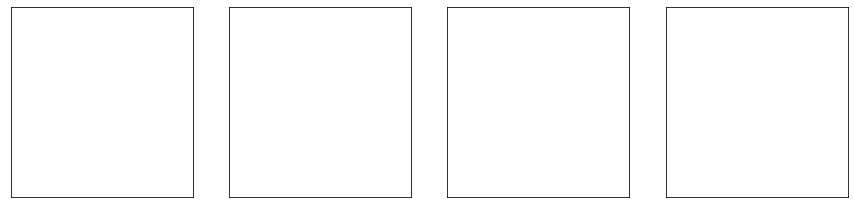

In [16]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,9)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, learn_rate = .05, radius_sq = 0.5, 
             lr_decay = .05, radius_decay = .05, epochs = 100)

In [17]:
find_BMU(SOM, featureImageStair[0]['feature'])

(0, 0)

In [18]:
SOMimages = []
for i in range(3):
    row = []
    for j in range(3):
        row.append([])
    SOMimages.append(row)

In [19]:
SOMimages

[[[], [], []], [[], [], []], [[], [], []]]

In [20]:
for fi in featureImageStair:
    g,h = find_BMU(SOM,fi['feature'])
    SOMimages[g][h].append(fi)

In [21]:
SOMimages

[[[{'image': '00.jpg',
    'feature': array([0.        , 0.28820327, 1.9955529 , ..., 1.1165075 , 0.2768058 ,
           0.06702424], dtype=float32)},
   {'image': '01.jpg',
    'feature': array([0.7378206 , 0.4869755 , 0.00211739, ..., 1.8119795 , 0.48533717,
           0.0193064 ], dtype=float32)},
   {'image': '04.jpg',
    'feature': array([0.1490458 , 1.1731899 , 0.33516005, ..., 1.035115  , 2.0707984 ,
           0.        ], dtype=float32)},
   {'image': '05.jpg',
    'feature': array([0.1490458 , 1.1731899 , 0.33516005, ..., 1.035115  , 2.0707984 ,
           0.        ], dtype=float32)},
   {'image': '06.jpg',
    'feature': array([0.        , 1.1018707 , 0.6724218 , ..., 0.31756932, 0.88596684,
           0.        ], dtype=float32)},
   {'image': '09.jpg',
    'feature': array([0.21765736, 0.30294013, 0.5274901 , ..., 0.93180966, 0.20011093,
           0.12564409], dtype=float32)},
   {'image': '22.jpg',
    'feature': array([0.6247764 , 0.9591672 , 1.6981853 , ..., 2.044556

In [22]:
from scipy import spatial

imageGrid = []
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            tree = spatial.KDTree([d['feature'] for d in cell])
            bmd = tree.query(SOM[g][h])
            imageGrid.append(cell[bmd[1]]['image'])
        else:
            imageGrid.append('white.png')

In [23]:
def img_reshape(img):
    img = Image.open('Stair/'+img).convert('RGB')
    img = img.resize((100,100))
    img = np.asarray(img)
    return img

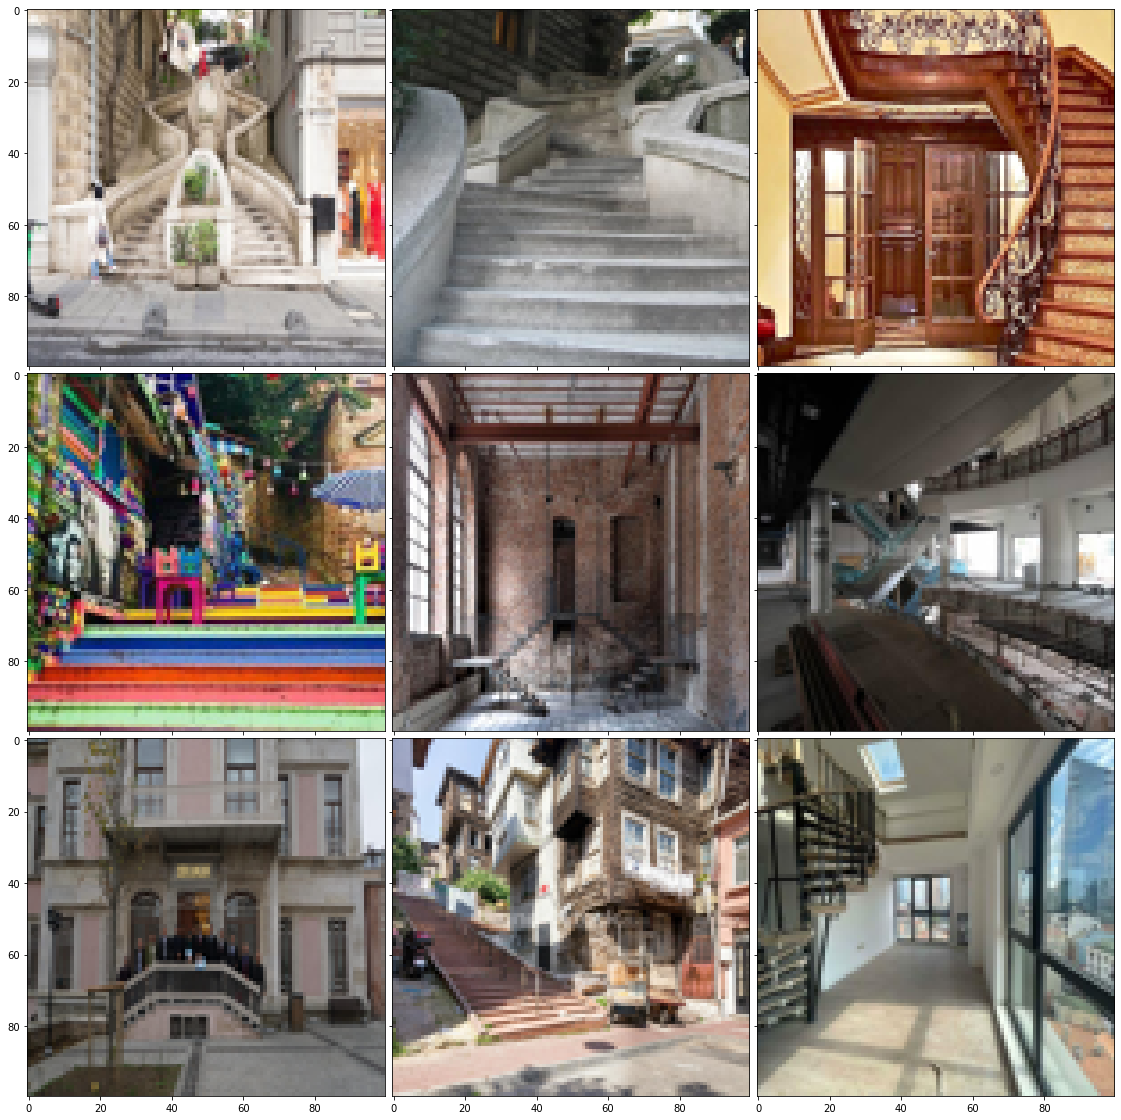

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

img_arr = []
for image in imageGrid:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()

In [25]:
somName = 'SOMimageStair'
os.mkdir(somName)
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        folder = str(g)+'_'+str(h)
        os.mkdir(somName+'/'+folder)

In [26]:
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        folder = str(g)+'_'+str(h)
        for i in cell:
            shutil.copy('Stair/'+i['image'], somName+'/'+folder)